Data Understanding and Exploration

In [70]:
import optuna
from optuna.samplers import TPESampler
import xgboost as xgb
import lightgbm as lgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score



In [6]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [8]:
# converting numerical features 

numerical_columns_to_convert = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs', 
    'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    ]

for column in numerical_columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors ='coerce')



In [9]:
print(df.dtypes)

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives                object
Hormonal Contraceptives (years)       float64
IUD                                    object
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [10]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [11]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,741.000000,753.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,2.256419,0.514804,0.104914,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,3.764254,1.943089,0.306646,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,30.000000,19.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


EXPLORATORY DATA ANALYSIS

In [12]:
# determining the null vlaues and handling "?"

df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')

df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

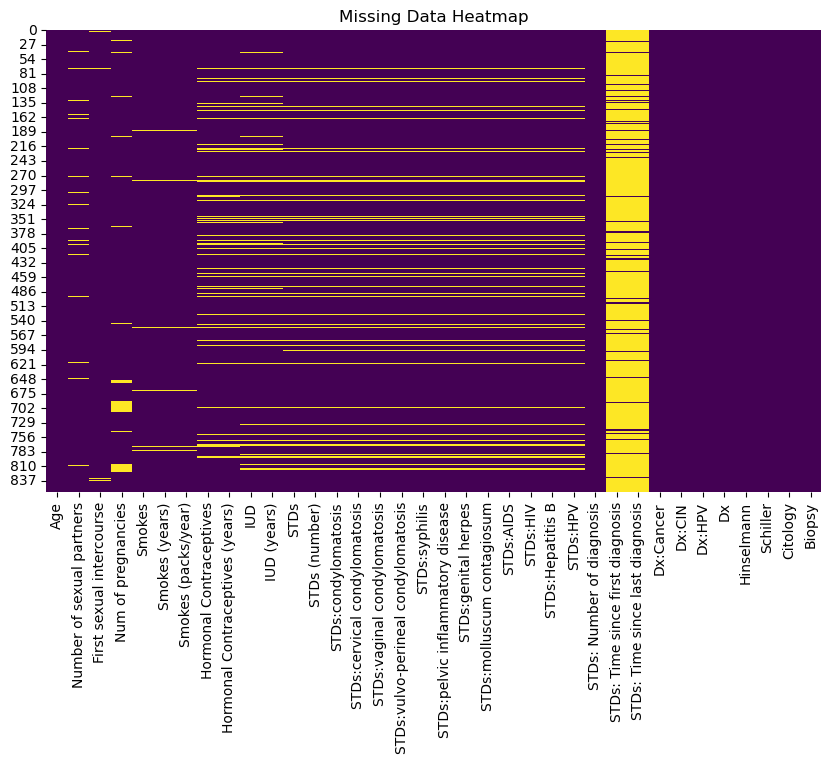

In [13]:
# Visualizing the missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### INSIGHTS FROM HEATMAP ANALYSIS 

- Purple indicates available data, while yellow shows missing data
- Age, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Hinselmann, Schiller, Citology, and Biopsy do not have missing values
- 

In [14]:
df['Biopsy'].value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

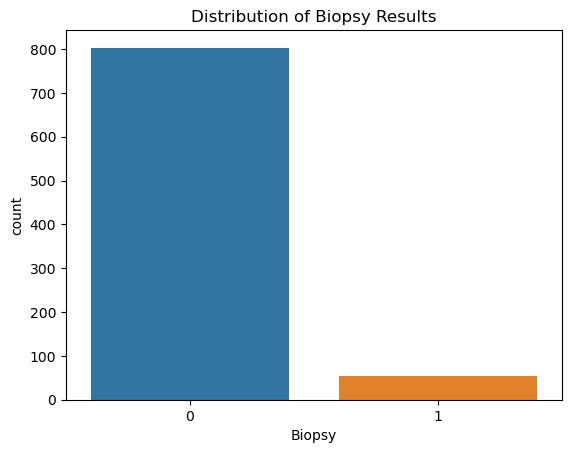

In [15]:
# Plotting the distribution of the target variable

sns.countplot(x='Biopsy', data=df)
plt.title('Distribution of Biopsy Results')
plt.show()

This distribution suggests that the dataset is imbalanced, with a much higher number of negative biopsy results (0) compared to positive biopsy results (1)

Oversampling the minority class, using metrics like precision, recall, and F1-score are often used to address the issue of imbalance when building models with this type of dataset.

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


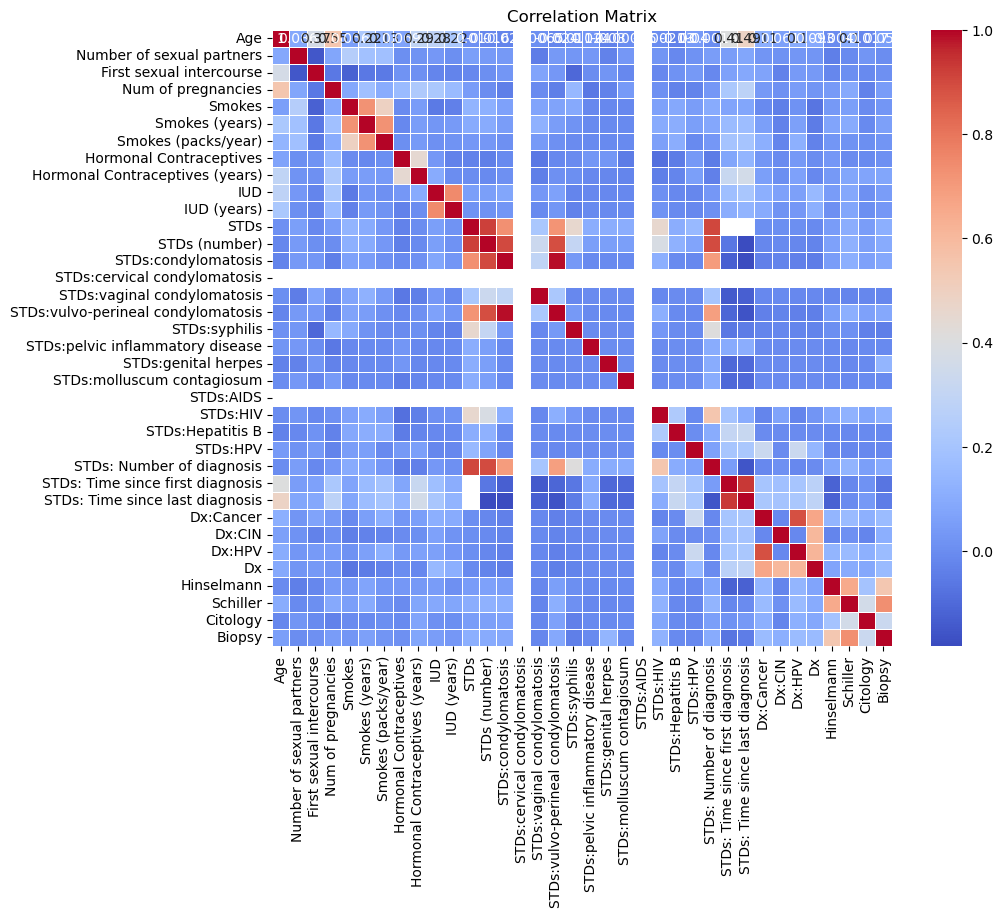

In [16]:
#  Correlation Matrix Plot

correlation_matrix = df.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


 The color scale on the right indicates the strength and direction of the correlation, with dark red representing a perfect positive correlation (1), white representing no correlation (0), and dark blue representing a perfect negative correlation (-1)

In [17]:
#Show correlation of each feature with the target variable

print(correlation_matrix['Biopsy'].sort_values(ascending=False))

Biopsy                                1.000000
Schiller                              0.733204
Hinselmann                            0.547417
Citology                              0.327466
Dx:Cancer                             0.160905
Dx:HPV                                0.160905
Dx                                    0.157607
STDs:genital herpes                   0.132526
STDs:HIV                              0.126880
Dx:CIN                                0.113172
STDs                                  0.109099
STDs (number)                         0.098347
STDs: Number of diagnosis             0.097449
STDs:vulvo-perineal condylomatosis    0.088902
STDs:condylomatosis                   0.086390
Hormonal Contraceptives (years)       0.079388
Smokes (years)                        0.062044
Age                                   0.055956
IUD                                   0.053194
Num of pregnancies                    0.046416
IUD (years)                           0.033275
Smokes       

In [18]:
numerical_columns = [
    'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs', 
    'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    ]


for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
# Filling missing values with the median 
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [20]:
# Handling missing values for categorical variables

df = pd.get_dummies(data = df, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [21]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.064103
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000


Age Interpretation:

The average age of the patients is around 26.8 years.
The age distribution spans from 13 to 84 years.
The middle 50% of the ages lie between 20 and 32 years.
The distribution is relatively spread out, indicated by a standard deviation of 8.5.
STDs: Number of Diagnosis

STDs(NUMBER) Interpretation:

On average, patients have very few diagnoses of STDs, with a mean close to 0.09.
The majority of patients have 0 diagnoses of STDs, as indicated by the 25th, 50th, and 75th percentiles all being 0.
There are a few patients with higher numbers of STD diagnoses, with a maximum value of 3, which indicates a right-skewed distribution.

Tests Interpretation:

The tests (Hinselmann, Schiller, Citology) and biopsy results show low mean values, indicating that a small proportion of patients tested positive.
Similar to the diagnosis features, the binary nature and low means suggest more negative results.
The standard deviations indicate some variability, but the percentiles show that the majority of the results are negative (0)

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

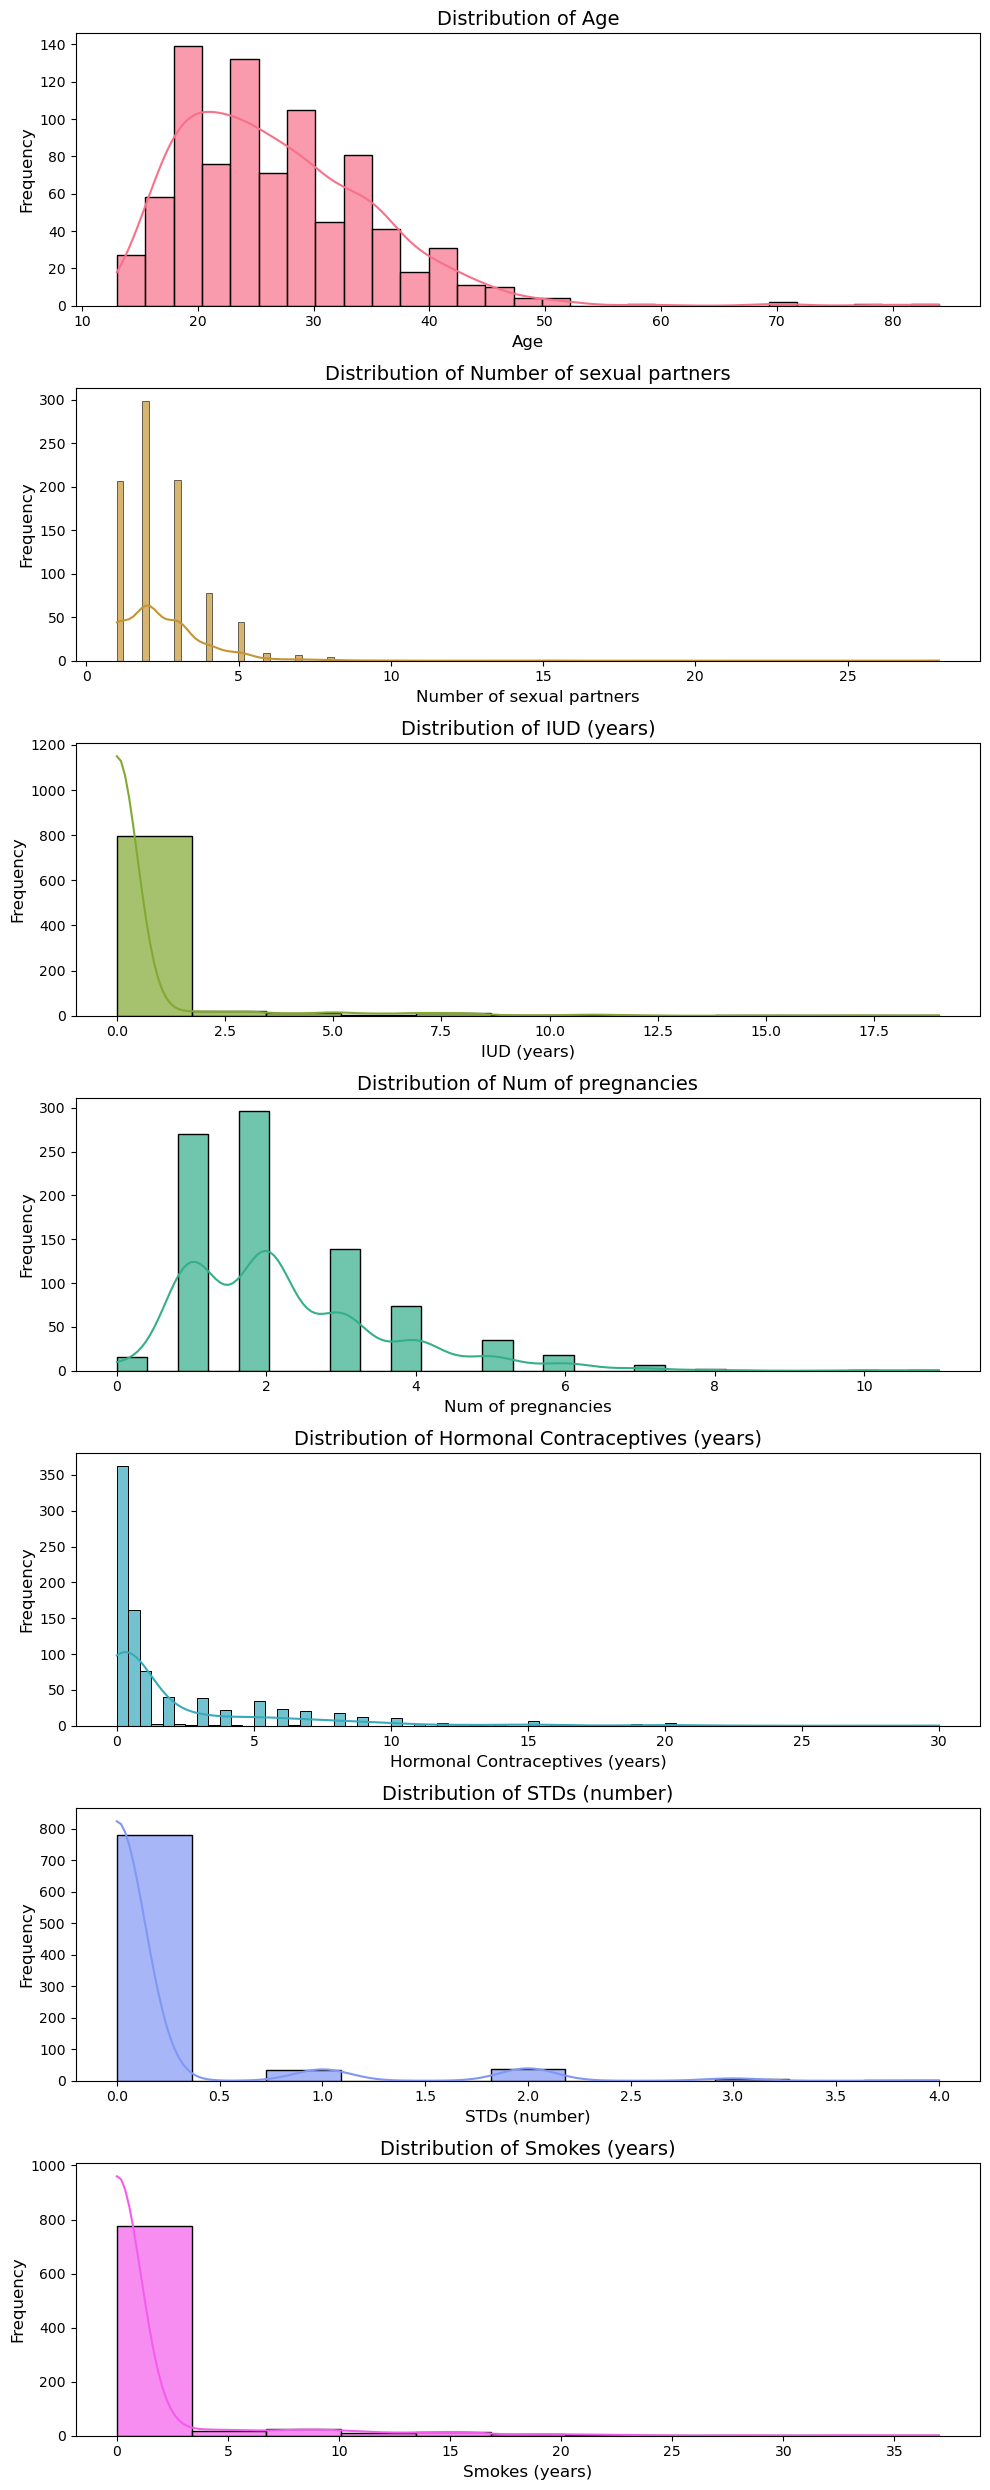

In [22]:
# Plotting the distribution of key features
key_features = ['Age', 'Number of sexual partners', 'IUD (years)', 'Num of pregnancies', 'Hormonal Contraceptives (years)', 'STDs (number)', 'Smokes (years)']
palette = sns.color_palette('husl', len(key_features))


# Plotting the distribution of key features

fig, axes = plt.subplots(len(key_features), 1, figsize=(10, 25))
color = sns.color_palette('husl', 1)[0]

for ax, key_feature, color in zip(axes, key_features, palette):
    sns.histplot(df[key_feature].dropna(), kde=True, ax=ax, color=color, alpha=0.7)
    ax.set_title(f'Distribution of {key_feature}', fontsize=14)
    ax.set_xlabel(key_feature, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()


FEATURE ENGINEERING

In [23]:
stds_columns = ['STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    ]


df['STDs_count'] = df[stds_columns].sum(axis=1)


In [24]:
# Check for NaNs in STDs_count column
print("NaNs in STDs_count column after calculation:")
print(df['STDs_count'].isnull().sum())

NaNs in STDs_count column after calculation:
0


In [25]:
# Total Contraceptive Usage years
df['Total_contraceptive_usage_years'] = df['Hormonal Contraceptives (years)'] + df['IUD (years)']


In [26]:
df['Total_smoking'] = df['Smokes (years)'] * df['Smokes (packs/year)']

In [27]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy,STDs_count,Total_contraceptive_usage_years,Total_smoking
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.201241,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.064103,7.720280,2.479935,7.029576
std,8.497948,1.644759,2.791883,1.400981,4.060623,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.245078,3.989026,4.024119,56.857613
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,7.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,7.000000,0.500000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,7.000000,3.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,48.000000,30.000000,1369.000000


Normalization/Standardization (Normalizing Numerical Columns)

In [28]:
# num_cols_to_scale = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
#     'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
#     'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
#     'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
#     'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
#     'STDs_count', 'Total_smoking', 'Total_contraceptive_usage_years']

# for col in num_cols_to_scale:
#     df[col]= pd.to_numeric(df[col], errors ='coerce')
    
# scaler = StandardScaler()
# df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

In [29]:
# checking for outliers and treating appropriately
num_cols_to_scale = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)',
    'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B',
    'STDs:HPV', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 
    'STDs_count', 'Total_smoking', 'Total_contraceptive_usage_years']


Q1 = df[num_cols_to_scale].quantile(0.25)
Q3 = df[num_cols_to_scale].quantile(0.75)
IQR = Q3 - Q1
df_non_outliers = df[~((df[num_cols_to_scale] < (Q1 - 1.5 * IQR)) | (df[num_cols_to_scale] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [30]:
# Check the shape of the DataFrame to see how many rows were removed
print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_non_outliers.shape}")

Original data shape: (858, 50)
Data shape after removing outliers: (477, 50)


Feature Selection Using Random Forest

In [31]:
# Using Random Forest

X = df_non_outliers.drop('Biopsy', axis=1)
y = df_non_outliers['Biopsy']

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X,y)

RandomForestClassifier(random_state=42)

In [32]:
important = random_forest.feature_importances_


importances_feature = pd.DataFrame({'Feature': X.columns,'Importance': important })

# Sorting by importance

importances_feature = importances_feature.sort_values(by = 'Importance', ascending= False)
print(importances_feature)


                               Feature  Importance
45                          Schiller_1    0.174846
44                          Schiller_0    0.113458
41                        Hinselmann_1    0.087316
40                        Hinselmann_0    0.087270
2             First sexual intercourse    0.078638
0                                  Age    0.075095
1            Number of sexual partners    0.066458
3                   Num of pregnancies    0.043190
6      Hormonal Contraceptives (years)    0.041258
42                          Citology_0    0.040074
47     Total_contraceptive_usage_years    0.036193
43                          Citology_1    0.030232
35                            Dx:CIN_1    0.017565
38                                Dx_0    0.017133
39                                Dx_1    0.016709
27         Hormonal Contraceptives_1.0    0.014553
34                            Dx:CIN_0    0.013042
28                             IUD_0.0    0.011377
26         Hormonal Contracepti

**Insights from Feature Importance Analysis Using Random Forest**

Top Influential Features:

Schiller Test Results (Schiller_1 and Schiller_0): The Schiller test results are the most influential features, with Schiller_1 (indicating a positive test result) having the highest importance score of 0.174846. This suggests that the presence or absence of a positive Schiller test result significantly impacts the model's ability to predict cervical cancer risk.
Hinselmann Test Results (Hinselmann_1 and Hinselmann_0): These features also contribute notably, indicating that Hinselmann test outcomes play a crucial role in the prediction.

Demographic and Sexual History:

Age and First Sexual Intercourse: Age (0.075095) and the age at first sexual intercourse (0.078638) are key demographic factors influencing the prediction, highlighting their relevance in assessing cervical cancer risk.
Number of Sexual Partners: This factor also shows some level of importance, with a score of 0.066458, reinforcing its significance in the context of cervical health.

Contraceptive Use:

Hormonal Contraceptives: The duration of hormonal contraceptive use (0.041258) and the total years of contraceptive usage (0.036193) are important, indicating a potential link between long-term contraceptive use and cervical cancer risk.
Test Results:

Citology Test Results: The Citology test results, although lower in the ranking, still show importance, especially Citology_0 (0.040074), which could suggest its role in providing additional predictive power.
Low-Importance Features:

Dx Features: Features like Dx:CIN_1, Dx:Cancer_1, Dx:HPV_0, and similar diagnostic results have relatively low importance. This might indicate that while diagnostic history is relevant, it may not be as critical in predicting outcomes in the context of this dataset.
STDs-Related Features: Many STDs-related features, like STDs:HPV, STDs: Number of diagnosis, and STDs: Time since first diagnosis, have an importance score of 0.000000, implying that they do not contribute to the model's predictions which could be due to their lack of correlation with the target variable.


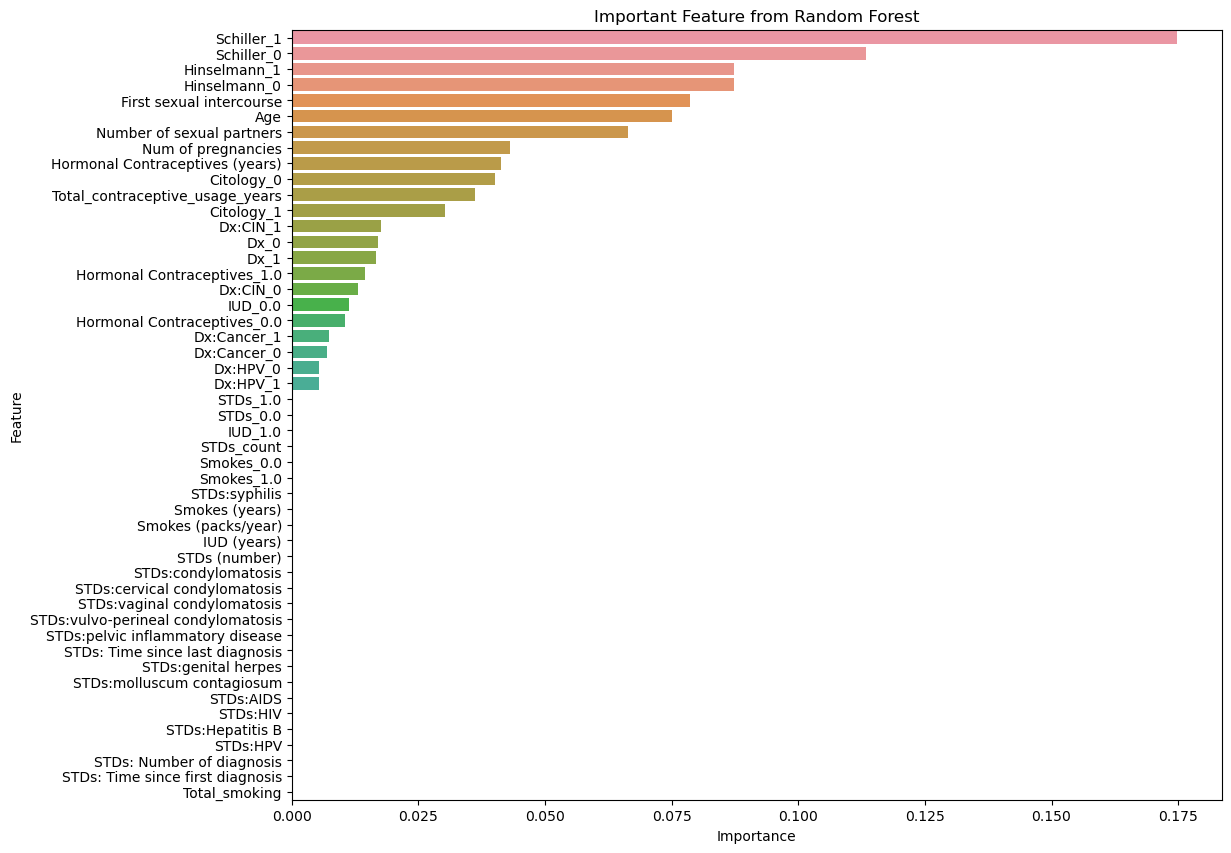

In [33]:
# Plotting Important Features

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data= importances_feature)
plt.title('Important Feature from Random Forest')
plt.show()

# Visualization Insights
The bar plot provides a clear visual representation of the importance scores, highlighting the features that the Random Forest model relies on most heavily for predictions. The significant drop-off in importance beyond the top few features suggests that while many variables were considered, only a select few are driving the model's decisions. This insight could guide further feature selection or model refinement efforts.

In [34]:
selected_features = importances_feature[importances_feature['Importance']> 0.01]['Feature']
X_selected = X[selected_features]

In [35]:
# Pipeline Construction for Model Training and Evaluation
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [58]:
# splitting data int0 training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected,y, test_size = 0.2, random_state=42)

In [52]:
#  Normalization/Standardization (Normalizing Numerical Columns)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Evaluation

In [61]:
models = {
    'RandomForest': Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', SVC(probability=True, random_state=42)),
    ]),
    'LogisticRegression': Pipeline(steps =[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'HistGradientBoosting': Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', HistGradientBoostingClassifier(random_state=42))
    ]),
    'DecisionTree': Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'recall': recall_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Print results
for eval_name, metrics in results.items():
    print(f"Results for {eval_name}:")

    for metric_name, value in metrics.items():
        if value is not None:
            if isinstance(value, float):
                print(f"{metric_name.capitalize()}: {value:.4f}")
            elif isinstance(value, int):
                print(f"{metric_name.capitalize()}: {value}")
            elif isinstance(value, np.ndarray):  # Handling confusion matrix or other arrays
                print(f"{metric_name.capitalize()}:\n{value}")
    
    print()


Results for RandomForest:
Accuracy: 0.9688
Precision: 0.6000
F1: 0.6667
Roc_auc: 0.9891
Recall: 0.7500
Confusion_matrix:
[[90  2]
 [ 1  3]]

Results for SVM:
Accuracy: 0.9896
Precision: 1.0000
F1: 0.8571
Roc_auc: 0.9918
Recall: 0.7500
Confusion_matrix:
[[92  0]
 [ 1  3]]

Results for LogisticRegression:
Accuracy: 0.9688
Precision: 0.6000
F1: 0.6667
Roc_auc: 0.9891
Recall: 0.7500
Confusion_matrix:
[[90  2]
 [ 1  3]]

Results for HistGradientBoosting:
Accuracy: 0.9479
Precision: 0.0000
F1: 0.0000
Roc_auc: 0.9891
Recall: 0.0000
Confusion_matrix:
[[91  1]
 [ 4  0]]

Results for DecisionTree:
Accuracy: 0.9688
Precision: 0.6667
F1: 0.5714
Roc_auc: 0.7446
Recall: 0.5000
Confusion_matrix:
[[91  1]
 [ 2  2]]



**Model Evaluation Insights**
- The RandomForest model is generally strong, but its precision and recall scores suggest that while it’s good at avoiding false negatives, it does sometimes predict false positives.

-  The SVM model is highly precise, making no false positive predictions, but it has the same recall as the RandomForest model, meaning it misses some true positives, and also the SVM model also has one false negative.

- The HistGradientBoosting model struggles with positive case predictions, leading to poor precision and recall its current decision threshold isn't optimal, leading to poor classification performance.





Hyperparameter Tuning


In [39]:
# Hyperparameter grid for SVC
svc_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto']
}

In [40]:
# GridSearchCV for SVM
svc_grid_search = GridSearchCV(models['SVM'], svc_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
svc_grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVM:", svc_grid_search.best_params_)
print("Best ROC AUC for SVM:", svc_grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best ROC AUC for SVM: 0.974124809741248


In [41]:
# Evaluate tuned SVM model
y_pred_svc = svc_grid_search.best_estimator_.predict(X_test)
y_prob_svc = svc_grid_search.best_estimator_.predict_proba(X_test)[:, 1]

results['Tuned SVM'] = {
    'accuracy': accuracy_score(y_test, y_pred_svc),
    'precision': precision_score(y_test, y_pred_svc),
    'f1': f1_score(y_test, y_pred_svc),
    'roc_auc': roc_auc_score(y_test, y_prob_svc),
    'recall': recall_score(y_test, y_pred_svc),
    'confusion_matrix': confusion_matrix(y_test, y_pred_svc)
}

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# Print results
for eval_name, metrics in results.items():
    print(f"Results for {eval_name}:")

    for metric_name, value in metrics.items():
        if value is not None:
            if isinstance(value, float):
                print(f"{metric_name.capitalize()}: {value:.4f}")
            elif isinstance(value, int):
                print(f"{metric_name.capitalize()}: {value}")
            elif isinstance(value, np.ndarray):  # Handling confusion matrix or other arrays
                print(f"{metric_name.capitalize()}:\n{value}")
    
    print()


Results for RandomForest:
Accuracy: 0.9688
Precision: 0.6000
F1: 0.6667
Roc_auc: 0.9891
Recall: 0.7500
Confusion_matrix:
[[90  2]
 [ 1  3]]

Results for SVM:
Accuracy: 0.9896
Precision: 1.0000
F1: 0.8571
Roc_auc: 0.9918
Recall: 0.7500
Confusion_matrix:
[[92  0]
 [ 1  3]]

Results for HistGradientBoosting:
Accuracy: 0.9479
Precision: 0.0000
F1: 0.0000
Roc_auc: 0.9891
Recall: 0.0000
Confusion_matrix:
[[91  1]
 [ 4  0]]

Results for DecisionTree:
Accuracy: 0.9688
Precision: 0.6667
F1: 0.5714
Roc_auc: 0.7446
Recall: 0.5000
Confusion_matrix:
[[91  1]
 [ 2  2]]

Results for Tuned SVM:
Accuracy: 0.9583
Precision: 0.0000
F1: 0.0000
Roc_auc: 0.9918
Recall: 0.0000
Confusion_matrix:
[[92  0]
 [ 4  0]]



Model Evaluation Summary
RandomForest:

High accuracy and ROC AUC indicating good overall performance.
Moderate precision with a significant number of false positives.
Good recall, but potential for improvement in reducing false negatives.
SVM

Excellent accuracy and precision with no false positives.
Consistent recall similar to RandomForest.
Strong overall performance, making it a reliable choice.

HistGradientBoosting:

Poor precision, recall, and F1 score despite good accuracy.
Ineffective at identifying positive cases, rendering it unsuitable for the task.

DecisionTree:

Balanced precision and recall but not exceptional in either.
Moderate F1 score reflecting a trade-off between precision and recall.
Adequate performance but may need tuning for better results.

Tuned SVM:

High accuracy and ROC AUC, but completely fails in identifying positive cases.
Zero precision, recall, and F1 score make it ineffective for the task despite good separation ability.


    RECOMMENDATIONS

-SVM stands out as the most promising model with high accuracy, perfect precision, and a good F1 score. It should be considered for further use or slight tuning.

-RandomForest also shows good potential with a balanced performance and might benefit from hyperparameter tuning to reduce false positives.

-HistGradientBoosting and Tuned SVM should be reconsidered or extensively tuned, as they currently fail to provide reliable results in detecting true positives.

-Ensembling methods like XGBoost or LightGBM could be explored to combine the strengths of multiple models, potentially improving overall performance and reducing false negatives.

In [43]:
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on the test set
lgb_pred = lgb_model.predict(X_test)

# Evaluate the LightGBM model
print("LightGBM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, lgb_pred))
print("Recall:", recall_score(y_test, lgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred))
print("Classification Report:\n", classification_report(y_test, lgb_pred))


[LightGBM] [Info] Number of positive: 17, number of negative: 364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 381, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.044619 -> initscore=-3.063941
[LightGBM] [Info] Start training from score -3.063941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


- LightGBM shows good accuracy but struggles with detecting positive cases (recall of 50% for class 1).
The model is not capturing positive cases effectively, as indicated by the warnings about no further splits with positive gain.

In [44]:
# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Recall:", recall_score(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))


XGBoost Model Evaluation:
Accuracy: 0.9791666666666666
Recall: 0.75
Confusion Matrix:
 [[91  1]
 [ 1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        92
           1       0.75      0.75      0.75         4

    accuracy                           0.98        96
   macro avg       0.87      0.87      0.87        96
weighted avg       0.98      0.98      0.98        96



- XGBoost performs well with high accuracy and a good recall for the positive class.
The model effectively detects positive cases compared to LightGBM

In [69]:
# Define the objective function for SVM
def objective_svm(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])

    model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Define the objective function for HistGradientBoosting
def objective_histboost(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1)
    max_iter = trial.suggest_int('max_iter', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    model = HistGradientBoostingClassifier(
        learning_rate=learning_rate,
        max_iter=max_iter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Optimize SVM
study_svm = optuna.create_study(direction='maximize', sampler=TPESampler())
study_svm.optimize(objective_svm, n_trials=50)
print("Best parameters for SVM:", study_svm.best_params)



# Evaluate SVM with best parameters
best_params_svm = study_svm.best_params
svm_model = SVC(C=best_params_svm['C'], gamma=best_params_svm['gamma'], kernel=best_params_svm['kernel'], random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Model Evaluation with Optimized Parameters:")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))



[I 2024-08-23 12:56:58,024] A new study created in memory with name: no-name-b503b775-4094-411a-84e3-c9a1ff2baac7
C:\Users\DELL\AppData\Local\Temp\ipykernel_13768\2520485620.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-08-23 12:56:58,172] Trial 0 finished with value: 0.9375 and parameters: {'C': 125.02219075275342, 'gamma': 'auto', 'kernel': 'poly'}. Best is trial 0 with value: 0.9375.
C:\Users\DELL\AppData\Local\Temp\ipykernel_13768\2520485620.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-08-23 12:56:58,184] Trial 1 finished with value: 0.9583333333333

Best parameters for SVM: {'C': 0.1498841783989169, 'gamma': 'scale', 'kernel': 'linear'}
SVM Model Evaluation with Optimized Parameters:
Accuracy: 0.9895833333333334
Recall: 0.75
Confusion Matrix:
 [[92  0]
 [ 1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       1.00      0.75      0.86         4

    accuracy                           0.99        96
   macro avg       0.99      0.88      0.93        96
weighted avg       0.99      0.99      0.99        96



SVM MODEL EVALUSTION WITH OPTIMIZED PARAMETERS

- Accuracy: 0.9896  
SVM with optimized parameters achieves the highest accuracy at 98.96%, indicating strong overall performance.


- Confusion Matrix:  
The model correctly identified all instances of class 0 and misclassified only 1 instance of class 1.

### Comparative Analysis  
- Accuracy: SVM performs the best with an accuracy of 98.96%, followed by XGBoost (97.92%) and LightGBM (95.83%).


- Recall:  Both XGBoost and SVM achieve a recall of 0.75 for the minority class, which is a significant improvement over LightGBM's recall of 0.50

- Precision and F1-Score: SVM has the highest precision (1.00) and F1-score (0.86) for the minority class, making it the best choice when considering both false positives and false negatives.
XGBoost is second with a precision and F1-score of 0.75, showing better performance than LightGBM.

- Confusion Matrix:  SVM and XGBoost are better at reducing false negatives compared to LightGBM, with SVM having the fewest errors overall.



SMOTE( Synthetic Over-sampling Technique) AND STACKING

This techniques are implemented to handle class imbalance and improve model performance.

In [71]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [76]:
# Defining the models for stacking

estimators = [
    ('xgb', xgb.XGBClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42, C=best_params_svm['C'], gamma=best_params_svm['gamma'], kernel=best_params_svm['kernel']))
]

In [77]:
# Replace or remove special characters in feature names
X_train_smote.columns = X_train_smote.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
X_test.columns = X_test.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)


In [78]:
# Stacking Classifier

stacking_clf = StackingClassifier(estimators= estimators, final_estimator = LogisticRegression(),cv=5 )
stacking_clf.fit(X_train_smote, y_train_smote)
stacking_pred = stacking_clf.predict(X_test)

In [79]:
# Evaluating Stacking Classifier

print("Stacking Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, stacking_pred))
print("Recall:", recall_score(y_test, stacking_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, stacking_pred))
print("Classification Report:\n", classification_report(y_test, stacking_pred))


Stacking Classifier Evaluation:
Accuracy: 0.96875
Recall: 0.75
Confusion Matrix:
 [[90  2]
 [ 1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98        92
           1       0.60      0.75      0.67         4

    accuracy                           0.97        96
   macro avg       0.79      0.86      0.83        96
weighted avg       0.97      0.97      0.97        96



In [80]:
#  Voting Classifier
voting_clf = VotingClassifier(estimators=estimators, voting='soft')
voting_clf.fit(X_train_smote, y_train_smote)
voting_pred = voting_clf.predict(X_test)



In [81]:
# Evaluate Voting Classifier
print("Voting Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, voting_pred))
print("Recall:", recall_score(y_test, voting_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, voting_pred))
print("Classification Report:\n", classification_report(y_test, voting_pred))

Voting Classifier Evaluation:
Accuracy: 0.9791666666666666
Recall: 1.0
Confusion Matrix:
 [[90  2]
 [ 0  4]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.67      1.00      0.80         4

    accuracy                           0.98        96
   macro avg       0.83      0.99      0.89        96
weighted avg       0.99      0.98      0.98        96



The Voting classifier outperformed the Stacking classifier, particularly in recall for the minority class (positive cases). Given that recall is often crucial in medical applications like cervical cancer prediction (where missing a positive case can have severe consequences), the Voting classifier of all models is the better choice.